In [8]:
import numpy as np
import dedalus.public as d3
import logging
logger = logging.getLogger(__name__)
import copy
import h5py
import numpy as np
import matplotlib
import re

import matplotlib.pyplot as plt
from dedalus.extras import plot_tools

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import Normalize

import os
from os import listdir

In [9]:
# Parameters
Lx, Lz = 20,1
Nx, Nz = 1280, 64
Ra_M = 1.0e7
M_0 = 0
M_H = -1


Prandtl = 1.0
stop_sim_time = 2000

nu = (Ra_M / (Prandtl*(M_0-M_H)*Lz**3))**(-1/2)

In [10]:
folder_dir = "analysis"

file_paths = [os.path.join(folder_dir, file) for file in listdir(folder_dir) if os.path.isfile(os.path.join(folder_dir, file)) and file.endswith('.h5')]
#sort by the number in the file name
file_paths.sort(key=lambda f: int(re.sub('\D', '', f)))
print(file_paths)

['analysis/analysis_s1.h5', 'analysis/analysis_s2.h5', 'analysis/analysis_s3.h5', 'analysis/analysis_s4.h5', 'analysis/analysis_s5.h5', 'analysis/analysis_s6.h5', 'analysis/analysis_s7.h5', 'analysis/analysis_s8.h5', 'analysis/analysis_s9.h5', 'analysis/analysis_s10.h5', 'analysis/analysis_s11.h5', 'analysis/analysis_s12.h5', 'analysis/analysis_s13.h5', 'analysis/analysis_s14.h5', 'analysis/analysis_s15.h5', 'analysis/analysis_s16.h5', 'analysis/analysis_s17.h5']


In [72]:
"""
DEBUGGING CONTROL GROUP
"""
folder_dir = "snapshots"

file_paths = [os.path.join(folder_dir, file) for file in listdir(folder_dir) if os.path.isfile(os.path.join(folder_dir, file)) and file.endswith('.h5')]
#sort by the number in the file name
file_paths.sort(key=lambda f: int(re.sub('\D', '', f)))
all_tot_ke = []

for file in file_paths:
    with h5py.File(file, mode='r') as file:
        uuyy = file['tasks']['uy']
        uuxz = file['tasks']['u']
        st = file['scales/sim_time']
        simtime = np.array(st)
        for t in range(0, len(simtime)):
            uuuyyy = np.transpose(uuyy[t, :, :])
            uuxz_trans = np.transpose(uuxz[t, :, :])
            print(np.average(uuuyyy), np.sum(np.square(uuuyyy)))
            print(np.average(uuxz_trans), np.sum(np.square(uuxz_trans)),np.max(uuxz_trans), np.min(uuxz_trans))
            uxxuzz = np.ndarray.tolist(uuxz_trans)
            for lay_1 in range(len(uuxz_trans)):
                for lay_2 in range(len(uuxz_trans[lay_1])):
                    modulus = np.linalg.norm(uuxz_trans[lay_1][lay_2])
                    uxxuzz[lay_1][lay_2] = modulus
            to_plot = np.square(uuuyyy)+np.square(uxxuzz)
            all_tot_ke.append(np.sum(to_plot))
            if t == 8:
                break
        print(len(all_tot_ke))
        print(np.max(all_tot_ke))
#print(all_tot_ke[])

0.0 0.0
0.0 0.0 0.0 0.0
1.189696936266817e-14 1.2112716952583467e-10
-6.532371473039913e-13 7.89647024033873e-06 5.496598370571843e-05 -6.102369726305601e-05
5.822887854498567e-14 5.375893597787984e-10
-1.7196006462479922e-12 1.3256331690509631e-05 7.274158115010029e-05 -8.021752010343457e-05
1.4428029539616534e-13 2.200055827882663e-09
-2.5451502218007276e-12 2.166274393036415e-05 9.142541626632307e-05 -9.95168828780624e-05
2.0242613498858774e-13 5.832076508907299e-09
-2.532646111342719e-12 3.089225197532328e-05 0.00010278655580413403 -0.00011337682725867022
2.2731673489048422e-13 1.0279625143376822e-08
-2.2654137585429552e-12 3.843228824646293e-05 0.00011978121515946916 -0.00012082006318731652
2.407084312832875e-13 1.670436423727539e-08
-1.874992211919973e-12 4.688140457347343e-05 0.00013844309322876306 -0.00012632441239626702
2.4340421136939643e-13 2.559258462243221e-08
-1.4020952347394868e-12 5.656487772927449e-05 0.00015926487108983663 -0.00013046127820957572
2.2691068524208108e-1

KeyboardInterrupt: 

In [56]:
"""
TOTAL KE
"""

all_tot_ke = []

for file in file_paths:
    with h5py.File(file, mode='r') as file:
        tot_ke = file['tasks']['total kinetic energy']
        print(np.max(tot_ke))
        st = file['scales/sim_time']
        simtime = np.array(st)
        for t in range(0, len(simtime)):
            all_tot_ke.append(np.sum(tot_ke[t]))
        print(len(all_tot_ke))
print(all_tot_ke[:10])
print(max(all_tot_ke))

0.33857162474148017
1000
0.021555192615614085
2000
0.00085373212240672
3000
0.00045422923952495294
4000
0.000295834538289396
5000
0.0002034440160592523
6000
0.0001432425310402408
7000
0.00010286522185215064
8000
7.496657045640747e-05
9000
5.528850461401865e-05
10000
4.1204002002359474e-05
11000
3.0973162110540964e-05
12000
2.3458939340375884e-05
13000
1.7883868369772185e-05
14000
1.3712419459044938e-05
15000
0.2351288169679756
16000
0.2704884635529055
16428
[0.0, 4.1826129282607897e-10, 9.095208333362382e-10, 1.380350367452813e-09, 1.846715476272872e-09, 2.7891426910214117e-09, 3.2725525651133957e-09, 3.767849365266554e-09, 4.277348218475673e-09, 4.803697443980447e-09]
0.33857162474148017


16428
16428


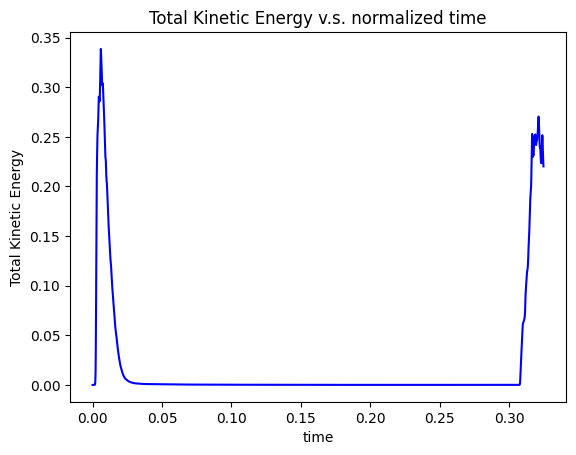

In [57]:
print(len(all_tot_ke))
figure_x_axis = np.array([(x*nu/(2**2)/4) for x in range(1, len(all_tot_ke)+1)])
print(len(figure_x_axis))
plt.plot(figure_x_axis, all_tot_ke, color = 'blue')
plt.xlabel('time')
plt.ylabel('Total Kinetic Energy')
plt.title('Total Kinetic Energy v.s. normalized time')
plt.show()

In [22]:
"""
mean KE
"""

all_mean_ke = []

for file in file_paths:
    with h5py.File(file, mode='r') as file:
        mean_ke = file['tasks']['mean kinetic energy']
        print(np.max(mean_ke))
        st = file['scales/sim_time']
        simtime = np.array(st)
        for t in range(0, len(simtime)):
            all_mean_ke.append(np.sum(mean_ke[t]))
        print(len(all_mean_ke))
print(all_mean_ke[:10])
print(max(all_mean_ke))

1.7921832053788584
1000
0.06918709067507851
2000
0.001942137889440053
3000
0.0009796937736258724
4000
0.0006228605441477373
5000
0.00042275011055098476
6000
0.00029517702284012756
7000
0.00021106889799586947
8000
0.00015355925516490472
9000
0.00011309643229925114
10000
8.424146837122328e-05
11000
6.329005948979845e-05
12000
4.7914718352833905e-05
13000
3.65099266839391e-05
14000
2.7979370800749684e-05
15000
1.2167226834944254
16000
1.2659605997819774
16428
[0.0, 1.875381297313805e-08, 4.0691888996572434e-08, 6.169212005865673e-08, 8.25484110296791e-08, 1.2493574566299093e-07, 1.4679319552965963e-07, 1.692573748921146e-07, 1.9243214937727215e-07, 2.1643575649282606e-07]
23.471800206997486


16428
16428


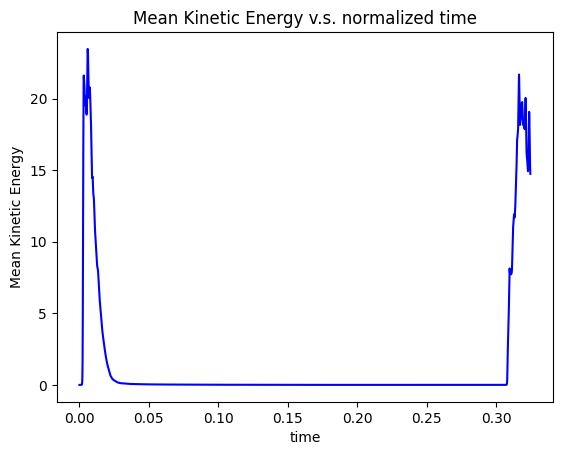

In [23]:
print(len(all_mean_ke))
figure_x_axis = np.array([(x*nu/(2**2)/4) for x in range(1, len(all_mean_ke)+1)])
print(len(figure_x_axis))
plt.plot(figure_x_axis, all_mean_ke, color = 'blue')
plt.xlabel('time')
plt.ylabel('Mean Kinetic Energy')
plt.title('Mean Kinetic Energy v.s. normalized time')
plt.show()

In [95]:
"""
UZ BUG, this is because added all uz together, generating things close to 0
"""
all_tot_uz = []
for file in file_paths:
    with h5py.File(file, mode='r') as file:
        uz = file['tasks']['mean ux']
        st = file['scales/sim_time']
        simtime = np.array(st)
        for t in range(0, len(simtime)):
            each_time_uz = uz[t]
            if t == 200:
                print(each_time_uz)
                break
            all_tot_uz.append(np.sum(np.square(each_time_uz)))
        print(len(all_tot_uz))
        print(max(all_tot_uz))
        break
print(all_tot_uz[:10])

[[ 1.77754946e-06  4.67861966e-06  1.04401546e-05  2.48810442e-05
   4.53221653e-05  8.64774532e-05  1.32898459e-04  2.13255767e-04
   2.85432877e-04  3.91244669e-04  4.24332820e-04  2.64271466e-04
  -5.36301483e-04 -2.30588622e-03 -5.10760829e-03 -8.96065461e-03
  -1.48411280e-02 -2.35063705e-02 -3.15603733e-02 -3.24943889e-02
  -2.45992803e-02 -1.43527090e-02 -1.52862239e-02 -3.27885387e-02
  -5.27094265e-02 -5.26902409e-02 -2.34270265e-02  2.53119750e-02
   7.78688834e-02  1.24798813e-01  1.58517630e-01  1.83186378e-01
   2.06548295e-01  2.19220578e-01  2.06707687e-01  1.55140332e-01
   7.02285084e-02 -2.13946243e-02 -1.00799812e-01 -1.67389333e-01
  -2.27252870e-01 -2.82106758e-01 -3.15354226e-01 -3.19060009e-01
  -2.94964507e-01 -2.53724775e-01 -2.11728157e-01 -1.63967045e-01
  -9.85606179e-02 -2.31631581e-02  4.25639414e-02  9.56594677e-02
   1.44773959e-01  1.94115971e-01  2.39666343e-01  2.74459104e-01
   2.96048279e-01  3.07034873e-01  3.11408958e-01  3.12384478e-01
   3.12048

In [86]:
# Directly use u has no prob
all_tot_xz = []
for file in file_paths:
    with h5py.File(file, mode='r') as file:
        uuxz = file['tasks']['u']
        st = file['scales/sim_time']
        simtime = np.array(st)
        for t in range(0, len(simtime)):
            if t%10 != 0:
                continue
            uuxz_trans = np.transpose(uuxz[t, :, :])
            print(np.average(uuxz_trans), np.sum(np.square(uuxz_trans)),np.max(uuxz_trans), np.min(uuxz_trans))
            uxxuzz = np.ndarray.tolist(uuxz_trans)
            for lay_1 in range(len(uuxz_trans)):
                for lay_2 in range(len(uuxz_trans[lay_1])):
                    modulus = np.linalg.norm(uuxz_trans[lay_1][lay_2])
                    uxxuzz[lay_1][lay_2] = modulus
            to_plot = np.square(uxxuzz)
            all_tot_xz.append(np.sum(to_plot))
        print(len(all_tot_xz))
        print(np.max(all_tot_xz))
#print(all_tot_ke[])

0.0 0.0 0.0 0.0
-2.5326404948207704e-12 3.089225197533841e-05 0.00010278655580409383 -0.00011337682725866448
-3.166109066129571e-13 8.149096636518177e-05 0.00020981632368669218 -0.0001392305664964833
5.39353604126092e-12 0.00024381161867744475 0.000453086541977817 -0.0001785655889345481
3.021331832113515e-11 0.000919960125208462 0.0010178678756977326 -0.00025796136821748343
1.647019711693286e-10 0.004198066074303121 0.002340014943698862 -0.00044985415927053466
8.81597452466698e-10 0.02155935100047836 0.005482312391608219 -0.001081456618157586
4.618427675242594e-09 0.11896977634061168 0.013138966781531838 -0.0026435207882323864
2.5275974126649765e-08 0.6888887432784521 0.03207711540090859 -0.006605666774619825
1.5799296524788923e-07 4.147851972379767 0.07909293077947335 -0.01767474162773006
1.2537623561906718e-06 26.279099315266095 0.19617781906469772 -0.06802747393781866
7.099215136977107e-06 116.70448920934304 0.39005296680570023 -0.23665921096240014
5.152307903426106e-05 485.73647320

KeyboardInterrupt: 

In [83]:
# ke given by Z
# I directly recorded Z. and the outcome looks no prob
all_tot_z = []
for file in file_paths:
    with h5py.File(file, mode='r') as file:
        uz = file['tasks']['uz']
        st = file['scales/sim_time']
        simtime = np.array(st)
        for t in range(0, len(simtime)):
            if t%10 != 0:
                continue
            uz_trans = np.transpose(uz[t, :, :])
            print(np.average(uz_trans), np.sum(np.square(uz_trans)),np.max(uz_trans), np.min(uz_trans))
            all_tot_xz.append(np.sum(uz_trans))
        print(len(all_tot_xz))
        print(np.max(all_tot_xz))
#print(all_tot_ke[])

0.0 0.0 0.0 0.0
4.913955764377417e-18 2.2825707232363316e-05 0.00010278655580409383 -0.00011337682725866448
-1.744316124104462e-18 6.080981296686377e-05 0.00020981632368669218 -0.0001392305664964833
5.501478992416681e-20 0.0001882801161872694 0.000453086541977817 -0.0001785655889345481
8.348526134727836e-18 0.0007321819690123527 0.0010178678756977326 -0.00025796136821748343
-2.4744373488139877e-18 0.0033901438588912606 0.002340014943698862 -0.0004454225683774054
1.3065991431165936e-17 0.017482803390200027 0.005482312391608219 -0.0009144921911799618
-2.0464316005663896e-19 0.09640947796178094 0.013138966781531838 -0.0020559025782717734
-8.000056780227415e-18 0.5556391107216327 0.03207711540090859 -0.00493899628803654
1.3552527156068805e-17 3.2991388527930017 0.07909293077947335 -0.012847385975855333
1.0213184464813452e-17 19.804865607798618 0.19617781906469772 -0.03960365425331936
4.553649124439119e-19 73.95821527865168 0.39005296680570023 -0.10994580744521681
5.464378949326942e-18 199.

KeyboardInterrupt: 

In [12]:
"""
问题就在这里
"""

all_tot_z2 = []
all_tot_z2_1 = []
for file in file_paths:
    with h5py.File(file, mode='r') as file:
        z2 = file['tasks']['ke by z xz']
        z2_1 = file['tasks']['ke by z zx']
        st = file['scales/sim_time']
        simtime = np.array(st)
        for t in range(0, len(simtime)):
            if t%10 != 0:
                continue
            print(z2[t], z2_1[t])
            all_tot_z2.append(np.sum(z2))
            all_tot_z2_1.append(np.sum(z2_1))
        print(len(all_tot_z2), len(all_tot_z2_1))
        print(np.max(all_tot_z2), np.max(all_tot_z2))
        break
#print(all_tot_ke[])
print()
print()
all_tot_x2 = []
for file in file_paths:
    with h5py.File(file, mode='r') as file:
        x2 = file['tasks']['ke by x xz']
        st = file['scales/sim_time']
        simtime = np.array(st)
        for t in range(0, len(simtime)):
            if t%10 != 0:
                continue
            print(x2[t])
            all_tot_x2.append(np.sum(x2))
        print(len(all_tot_x2))
        print(np.max(all_tot_x2))
        break

[[0.]] [[0.]]
[[8.04048521e-09]] [[8.04048521e-09]]
[[2.13396752e-08]] [[2.13396752e-08]]
[[6.59390678e-08]] [[6.59390678e-08]]
[[2.56345939e-07]] [[2.56345939e-07]]
[[1.18726954e-06]] [[1.18726954e-06]]
[[6.12398925e-06]] [[6.12398925e-06]]
[[3.37636141e-05]] [[3.37636141e-05]]
[[0.00019429]] [[0.00019429]]
[[0.00114658]] [[0.00114658]]
[[0.00671688]] [[0.00671688]]
[[0.0237074]] [[0.0237074]]
[[0.05999039]] [[0.05999039]]
[[0.10491655]] [[0.10491655]]
[[0.14599752]] [[0.14599752]]
[[0.19214227]] [[0.19214227]]
[[0.23035809]] [[0.23035809]]
[[0.25853942]] [[0.25853942]]
[[0.28297629]] [[0.28297629]]
[[0.28862878]] [[0.28862878]]
[[0.28270223]] [[0.28270223]]
[[0.28228758]] [[0.28228758]]
[[0.27807395]] [[0.27807395]]
[[0.26600428]] [[0.26600428]]
[[0.25541321]] [[0.25541321]]
[[0.24706806]] [[0.24706806]]
[[0.25319458]] [[0.25319458]]
[[0.27483605]] [[0.27483605]]
[[0.29675494]] [[0.29675494]]
[[0.32243892]] [[0.32243892]]
[[0.32118088]] [[0.32118088]]
[[0.30095686]] [[0.30095686]]
[[

In [14]:
all_tot_z = []
all_tot_z_1 = []
for file in file_paths:
    with h5py.File(file, mode='r') as file:
        z = file['tasks']['sum by z xz']
        z_1 = file['tasks']['sum by z zx']
        st = file['scales/sim_time']
        simtime = np.array(st)
        for t in range(0, len(simtime)):
            if t%10 != 0:
                continue
            print(z[t], z_1[t])
            all_tot_z.append(np.sum(z))
            all_tot_z_1.append(np.sum(z_1))
        print(len(all_tot_z), len(all_tot_z_1))
        print(np.max(all_tot_z), np.max(all_tot_z_1))
        break
#print(all_tot_ke[])
print()
print()
all_tot_x = []
for file in file_paths:
    with h5py.File(file, mode='r') as file:
        x = file['tasks']['sum by x xz']
        st = file['scales/sim_time']
        simtime = np.array(st)
        for t in range(0, len(simtime)):
            if t%10 != 0:
                continue
            print(x[t])
            all_tot_x.append(np.sum(x))
        print(len(all_tot_x))
        print(np.max(all_tot_x))
        break

[[0.]] [[0.]]
[[0.00028434]] [[0.00028434]]
[[0.00045758]] [[0.00045758]]
[[0.00077679]] [[0.00077679]]
[[0.00146391]] [[0.00146391]]
[[0.00298731]] [[0.00298731]]
[[0.00644719]] [[0.00644719]]
[[0.01446877]] [[0.01446877]]
[[0.03335736]] [[0.03335736]]
[[0.07820123]] [[0.07820123]]
[[0.18323506]] [[0.18323506]]
[[0.33836328]] [[0.33836328]]
[[0.56268723]] [[0.56268723]]
[[0.79177338]] [[0.79177338]]
[[0.96297165]] [[0.96297165]]
[[1.08259891]] [[1.08259891]]
[[1.19063852]] [[1.19063852]]
[[1.29250081]] [[1.29250081]]
[[1.4212385]] [[1.4212385]]
[[1.48312202]] [[1.48312202]]
[[1.53771102]] [[1.53771102]]
[[1.56539934]] [[1.56539934]]
[[1.5993895]] [[1.5993895]]
[[1.58999164]] [[1.58999164]]
[[1.59551425]] [[1.59551425]]
[[1.57055575]] [[1.57055575]]
[[1.5898801]] [[1.5898801]]
[[1.65517129]] [[1.65517129]]
[[1.70341038]] [[1.70341038]]
[[1.80129429]] [[1.80129429]]
[[1.80836888]] [[1.80836888]]
[[1.72685598]] [[1.72685598]]
[[1.67112008]] [[1.67112008]]
[[1.61668695]] [[1.61668695]]
[[

16428


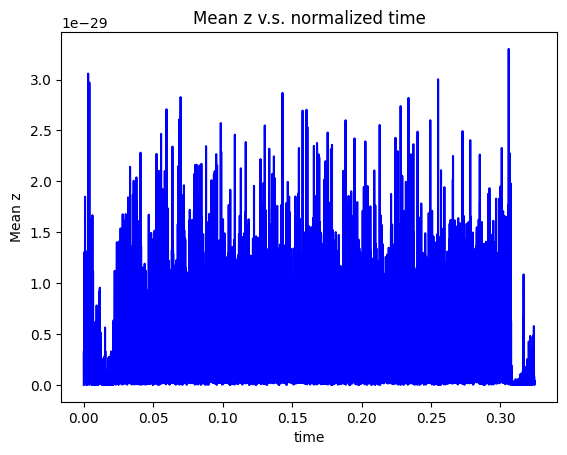

In [69]:
figure_x_axis = np.array([(x*nu/(2**2)/4) for x in range(1, len(all_tot_uz)+1)])
print(len(figure_x_axis))
plt.plot(figure_x_axis, all_tot_uz, color = 'blue')
plt.xlabel('time')
plt.ylabel('Mean z')
plt.title('Mean z v.s. normalized time')
plt.show()

8000
8000


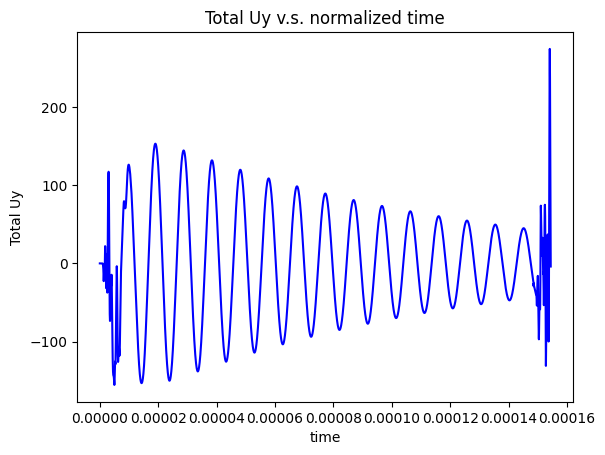

In [5]:
print(len(all_tot_uy))
figure_x_axis = np.array([(x*nu/(Nz**2)/4) for x in range(1, len(all_tot_uy)+1)])
print(len(figure_x_axis))
plt.plot(figure_x_axis, all_tot_uy, color = 'blue')
plt.xlabel('time')
plt.ylabel('Total Uy')
plt.title('Total Uy v.s. normalized time')
plt.show()